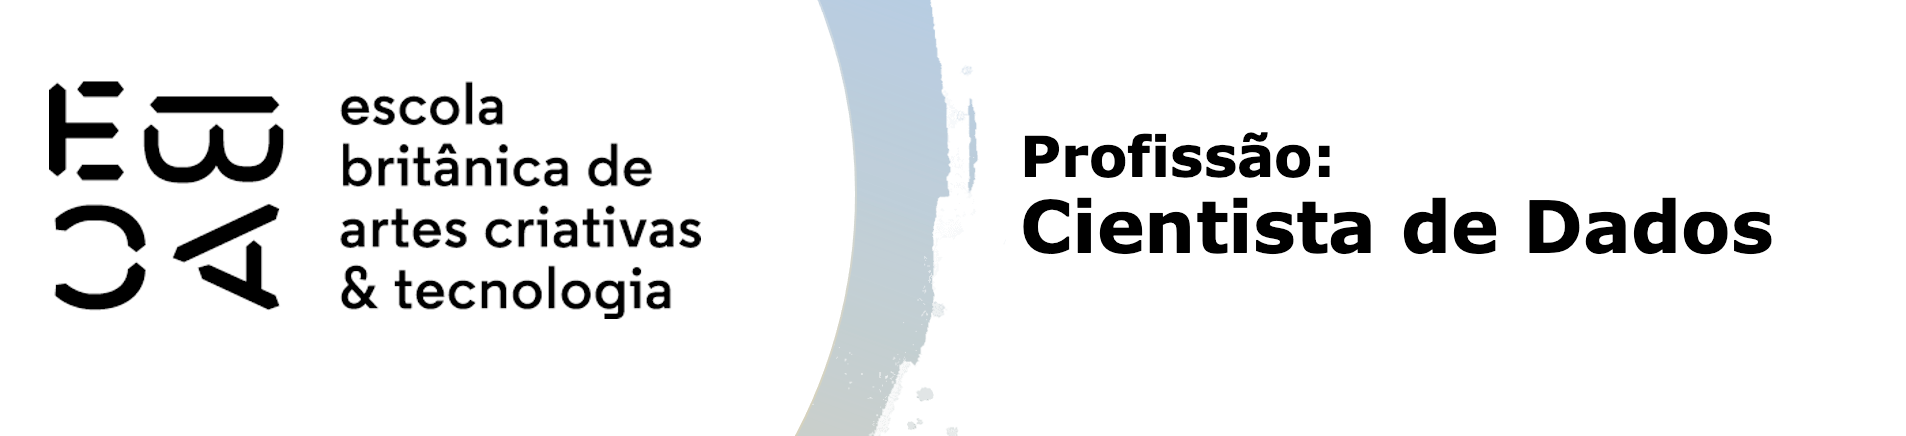

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [11]:
# Filtrando as variáveis do escopo
scope_columns = [
    'Administrative', 'Administrative_Duration', 
    'Informational', 'Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration'
]

# Análise descritiva básica
desc_stats = df[scope_columns].describe()

# Verificando valores missing
missing_values = df[scope_columns].isnull().sum()

# Mostrando os resultados
print("Estatísticas descritivas:")
print(desc_stats)
print("\nValores missing por variável:")
print(missing_values)

Estatísticas descritivas:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                34.472398       31.731468              1194.746220  
std                140.749294       44.475503              1913.669288  
min                  0.000000        0.000000                 0.000000  
25%                  0.

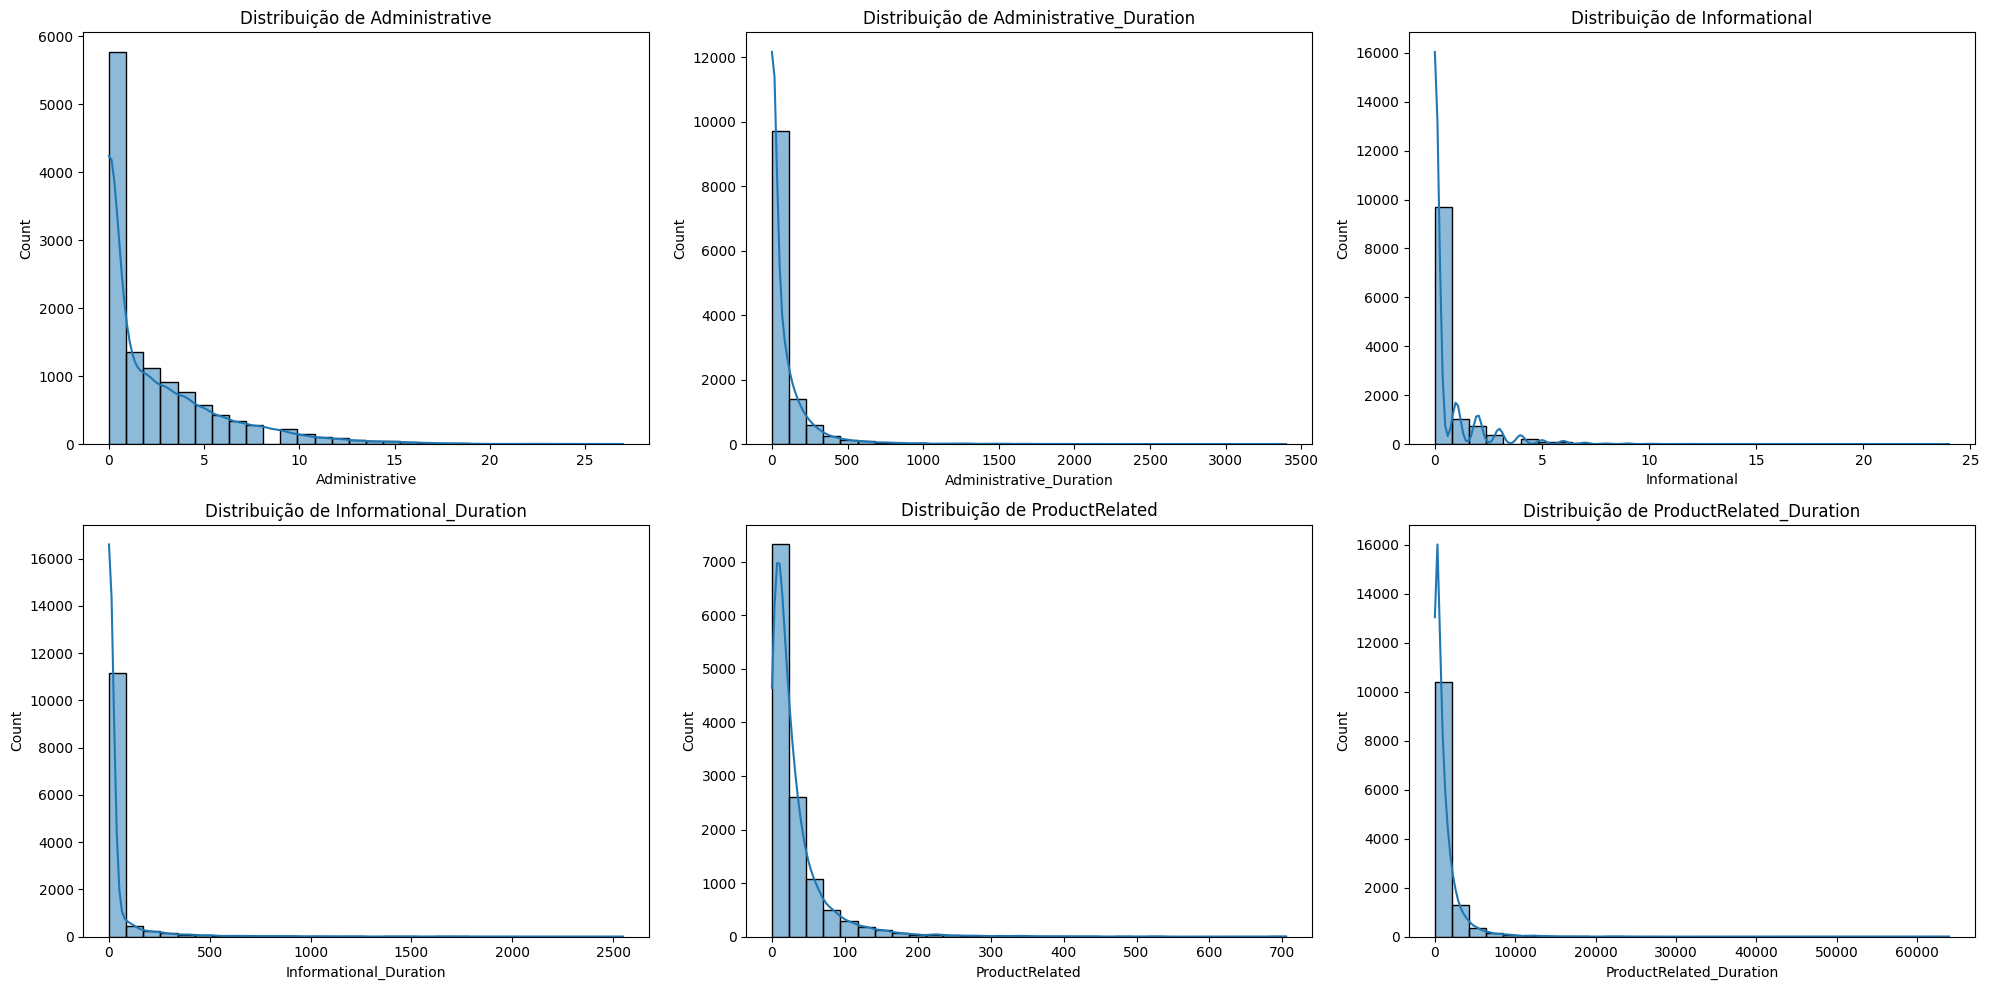

In [13]:
# Plotando distribuições para cada variável
plt.figure(figsize=(20, 10))
for i, column in enumerate(scope_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribuição de {column}')
plt.tight_layout()
plt.show()

In [17]:
# Normalizando os dados do escopo
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[scope_columns])

# Convertendo para DataFrame para visualização
normalized_df = pd.DataFrame(normalized_data, columns=scope_columns)

# Mostrando os primeiros valores normalizados
print("Dados normalizados:")
print(normalized_df.head())

Dados normalizados:
   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  
0                     0.0        0.001418                 0.000000  
1                     0.0        0.002837                 0.001000  
2                     0.0        0.001418                 0.000000  
3                     0.0        0.002837                 0.000042  
4                     0.0        0.014184                 0.009809  


In [19]:
# Contar proporção de valores zero em cada variável
zero_proportion = (df[scope_columns] == 0).sum() / len(df)
print("Proporção de zeros em cada variável:")
print(zero_proportion)

Proporção de zeros em cada variável:
Administrative             0.467802
Administrative_Duration    0.478751
Informational              0.786618
Informational_Duration     0.804947
ProductRelated             0.003082
ProductRelated_Duration    0.061233
dtype: float64


In [21]:
print("Valores mínimos após normalização:")
print(normalized_df.min())

print("Valores máximos após normalização:")
print(normalized_df.max())

Valores mínimos após normalização:
Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
dtype: float64
Valores máximos após normalização:
Administrative             1.0
Administrative_Duration    1.0
Informational              1.0
Informational_Duration     1.0
ProductRelated             1.0
ProductRelated_Duration    1.0
dtype: float64


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

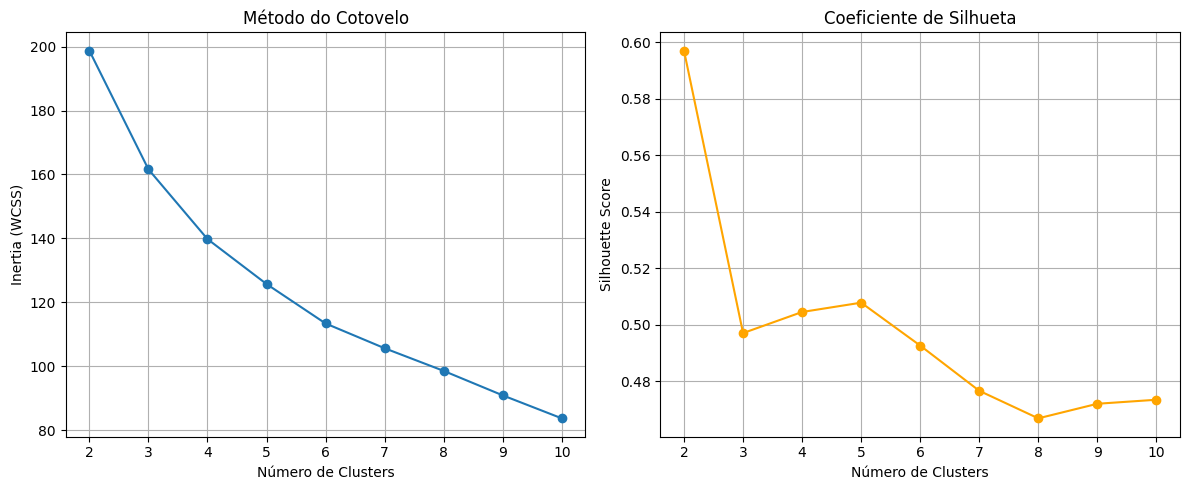

In [25]:
# Preparando os dados normalizados para K-Means
X = normalized_df

# Testando diferentes números de clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Testando de 2 a 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # WCSS (Inertia)
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o Método do Cotovelo
plt.figure(figsize=(12, 5))

# Gráfico do Método do Cotovelo
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid()

# Gráfico do Coeficiente de Silhueta
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

In [29]:
# Aplicando K-Means com k = 3 e k = 4
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Ajustando os modelos
df['Cluster_3'] = kmeans_3.fit_predict(normalized_df)
df['Cluster_4'] = kmeans_4.fit_predict(normalized_df)

# Análise descritiva para cada cluster (k = 3)
print("Análise descritiva para k = 3:")
desc_k3 = df.groupby('Cluster_3')[scope_columns].mean()
print(desc_k3)

# Análise descritiva para cada cluster (k = 4)
print("\nAnálise descritiva para k = 4:")
desc_k4 = df.groupby('Cluster_4')[scope_columns].mean()
print(desc_k4)

Análise descritiva para k = 3:
           Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                0.405801                14.669762       0.203520   
1                4.541004               156.372609       0.696450   
2               10.494970               369.328108       2.304829   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_3                                                                   
0                       11.860452       20.367005               767.759252  
1                       40.365274       39.859547              1476.515849  
2                      198.632620       97.250503              3734.089990  

Análise descritiva para k = 4:
           Administrative  Administrative_Duration  Informational  \
Cluster_4                                                           
0                0.405682                14.602858       0.186768   

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Análise descritiva para \( k = 3 \)

| Cluster | Administrative | Administrative_Duration | Informational | Informational_Duration | ProductRelated | ProductRelated_Duration |
|---------|----------------|--------------------------|---------------|-------------------------|----------------|--------------------------|
| 0       | 0.405801       | 14.669762               | 0.203520      | 11.860452              | 20.367005      | 767.759252              |
| 1       | 4.541004       | 156.372609              | 0.696450      | 40.365274              | 39.859547      | 1476.515849             |
| 2       | 10.494970      | 369.328108              | 2.304829      | 198.632620             | 97.250503      | 3734.089990             |

#### Interpretação
- **Cluster 0**:
  - Pouca interação em páginas administrativas, informativas e de produtos.
  - **Perfil**: Visitantes Casuais.
  
- **Cluster 1**:
  - Interação moderada em páginas administrativas, informativas e de produtos.
  - **Perfil**: Usuários Moderados.

- **Cluster 2**:
  - Alta interação em todas as categorias, indicando usuários muito engajados.
  - **Perfil**: Compradores Intensos.

---

### Análise descritiva para \( k = 4 \)

| Cluster | Administrative | Administrative_Duration | Informational | Informational_Duration | ProductRelated | ProductRelated_Duration |
|---------|----------------|--------------------------|---------------|-------------------------|----------------|--------------------------|
| 0       | 0.405682       | 14.602858               | 0.186768      | 7.947919               | 20.190506      | 760.197991              |
| 1       | 4.479227       | 153.632416              | 0.608052      | 25.939966              | 39.234783      | 1442.384727             |
| 2       | 5.016000       | 220.184238              | 4.912000      | 776.989650             | 93.324000      | 4360.240240             |
| 3       | 10.672287      | 365.875885              | 1.679663      | 91.110286              | 88.561644      | 3225.718843             |

#### Interpretação
- **Cluster 0**:
  - Baixa interação em todas as categorias.
  - **Perfil**: Visitantes Casuais.

- **Cluster 1**:
  - Interação moderada em páginas administrativas, informativas e de produtos.
  - **Perfil**: Usuários Moderados.

- **Cluster 2**:
  - Alta interação com foco em páginas informativas e produtos, indicando usuários que buscam muitos detalhes antes de tomar decisões.
  - **Perfil**: Usuários de Pesquisa Profunda.

- **Cluster 3**:
  - Alta interação em todas as categorias, mas com destaque menor em páginas informativas.
  - **Perfil**: Compradores Intensos.

---

### Conclusão
Com base nos resultados:
- O agrupamento \( k = 4 \) oferece uma segmentação mais detalhada, com a inclusão do perfil "Usuários de Pesquisa Profunda".
- Para uma análise simplificada, \( k = 3 \) é suficiente, mas \( k = 4 \) captura nuances adicionais dos comportamentos.

Recomenda-se utilizar \( k = 4 \) para obter maior profundidade na análise dos grupos.


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [34]:
# Avaliando as variáveis fora do escopo para k = 3
bounce_revenue_k3 = df.groupby('Cluster_3')[['BounceRates', 'Revenue']].mean()
print("Avaliação para k = 3:")
print(bounce_revenue_k3)

# Avaliando as variáveis fora do escopo para k = 4
bounce_revenue_k4 = df.groupby('Cluster_4')[['BounceRates', 'Revenue']].mean()
print("\nAvaliação para k = 4:")
print(bounce_revenue_k4)

Avaliação para k = 3:
           BounceRates   Revenue
Cluster_3                       
0             0.030480  0.119608
1             0.006622  0.205018
2             0.006102  0.274648

Avaliação para k = 4:
           BounceRates   Revenue
Cluster_4                       
0             0.030584  0.119860
1             0.006643  0.201932
2             0.007510  0.284000
3             0.005953  0.261328


# Avaliação de Resultados

Nesta etapa, avaliamos os grupos obtidos com relação às variáveis fora do escopo da análise, como **BounceRates** (taxa de rejeição) e **Revenue** (proporção de clientes que realizaram compras). O objetivo é identificar qual grupo possui os clientes mais propensos à compra.

---

## **Avaliação para \( k = 3 \)**

| Cluster | BounceRates | Revenue   |
|---------|-------------|-----------|
| 0       | 0.030480    | 0.119608  |
| 1       | 0.006622    | 0.205018  |
| 2       | 0.006102    | 0.274648  |

### **Interpretação:**
1. **Cluster 0 (Visitantes Casuais):**
   - Alta taxa de rejeição (0.030480).
   - Baixa propensão à compra (11.96% realizam compras).
   - **Perfil**: Usuários que não navegam profundamente no site, com baixa chance de conversão.

2. **Cluster 1 (Usuários Moderados):**
   - Taxa de rejeição mais baixa (0.006622).
   - Propensão à compra moderada (20.50% realizam compras).
   - **Perfil**: Usuários que interagem com o site de forma moderada, com maior chance de conversão.

3. **Cluster 2 (Compradores Intensos):**
   - Menor taxa de rejeição (0.006102).
   - Maior propensão à compra (27.46% realizam compras).
   - **Perfil**: Usuários altamente engajados no site, com alta chance de efetuar uma compra.

---

## **Avaliação para \( k = 4 \)**

| Cluster | BounceRates | Revenue   |
|---------|-------------|-----------|
| 0       | 0.030584    | 0.119860  |
| 1       | 0.006643    | 0.201932  |
| 2       | 0.007510    | 0.284000  |
| 3       | 0.005953    | 0.261328  |

### **Interpretação:**
1. **Cluster 0 (Visitantes Casuais):**
   - Alta taxa de rejeição (0.030584).
   - Baixa propensão à compra (11.98% realizam compras).
   - **Perfil**: Usuários que interagem minimamente com o site, com baixa probabilidade de conversão.

2. **Cluster 1 (Usuários Moderados):**
   - Taxa de rejeição moderada (0.006643).
   - Propensão à compra maior que o Cluster 0 (20.19% realizam compras).
   - **Perfil**: Usuários que realizam navegações com um propósito claro, mas sem profundidade extrema.

3. **Cluster 2 (Usuários de Pesquisa Profunda):**
   - Taxa de rejeição ligeiramente maior (0.007510).
   - Maior propensão à compra (28.40% realizam compras).
   - **Perfil**: Usuários que passam muito tempo pesquisando informações antes de efetuar uma compra.

4. **Cluster 3 (Compradores Intensos):**
   - Menor taxa de rejeição (0.005953).
   - Alta propensão à compra (26.13% realizam compras).
   - **Perfil**: Usuários com alta navegação e engajamento, próximos de realizar compras.

---

## **Conclusão**
- **Cluster mais propenso à compra:**
  - No agrupamento \( k = 3 \): **Cluster 2** (27.46% realizam compras).
  - No agrupamento \( k = 4 \): **Cluster 2** (28.40% realizam compras), seguido pelo **Cluster 3** (26.13%).

- **Escolha do agrupamento final:**
  - O agrupamento \( k = 4 \) oferece uma visão mais detalhada dos comportamentos dos usuários, separando os "Usuários de Pesquisa Profunda" dos "Compradores Intensos". Isso permite uma análise mais precisa e ações mais direcionadas.
  - **Observação:** Utilize **\( k = 4 \)** como o agrupamento final para análises futuras.

